In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

## The data

In [2]:
df = pd.read_csv("data/data_scaled.csv")
df.head()

,scaled_y,y,scaled_x1,scaled_x2,scaled_x3,scaled_x4,x_2_dumm,x_3_dumm,x_4_dumm,x1
0,-0.053227,139.0000,-0.143087,-0.087855,-0.096478,-0.089952,0,0,0,58.00
1,-0.034211,233.2596,-0.119559,-0.087855,-0.096478,-0.089952,0,0,0,79.34
2,-0.052016,145.0000,-0.105601,-0.087855,-0.096478,-0.089952,0,0,0,92.00
3,-0.057463,118.0000,-0.134267,-0.087855,-0.096478,-0.089952,0,0,0,66.00
4,-0.056051,125.0000,-0.128754,-0.087855,-0.096478,-0.089952,0,0,0,71.00


### Data Spliting

In [3]:
y = df['scaled_y']
X = df.drop(columns=['y', 'x_2_dumm', 'x_3_dumm', 'x_4_dumm', 'x1', 'scaled_y'])

In [4]:
X_train, X_test_cross, y_train, y_test_cross = train_test_split(X, y, test_size=0.4, random_state=101)

In [5]:
X_test, X_cross, y_test, y_cross = train_test_split(X_test_cross, y_test_cross, test_size=0.5,random_state=100)

In [6]:
print('y train vector size',  y_train.shape)
print('X train matrix size', X_train.shape)
print('- - * --'*3)
print('y test vector size',  y_test.shape)
print('X test matrix size', X_test.shape)
print('- - * --'*3)
print('y cross vector size',  y_cross.shape)
print('X cross matrix size', X_cross.shape)

y train vector size (5646,)
X train matrix size (5646, 4)
- - * --- - * --- - * --
y test vector size (1882,)
X test matrix size (1882, 4)
- - * --- - * --- - * --
y cross vector size (1882,)
X cross matrix size (1882, 4)


## Training

In [7]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [8]:
# Train the model on training data
rf.fit(X_train, y_train);

## Testing

In [9]:
yhat = rf.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, yhat)

In [11]:
mse

0.0013583096829836393

#### Variable Importance

In [12]:
feature_list = list(X_train.columns)

In [13]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: scaled_x1            Importance: 0.91
Variable: scaled_x3            Importance: 0.04
Variable: scaled_x4            Importance: 0.04
Variable: scaled_x2            Importance: 0.02


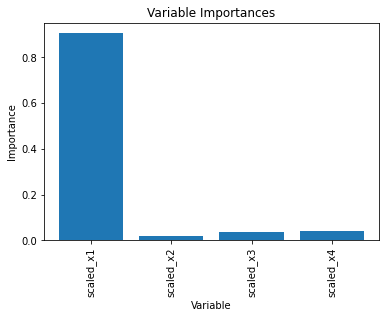

In [14]:
# Set the style
# plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Hyperparameter Tunning

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 